In [3]:
import numpy as np
import matplotlib.pyplot as plt

1 2
2 2
2 1
1 1
0 1
0 2
0 3
1 3
2 3
3 3
3 2
3 1
3 0
2 0
1 0
0 0
-1 0
-1 1
-1 2
-1 3


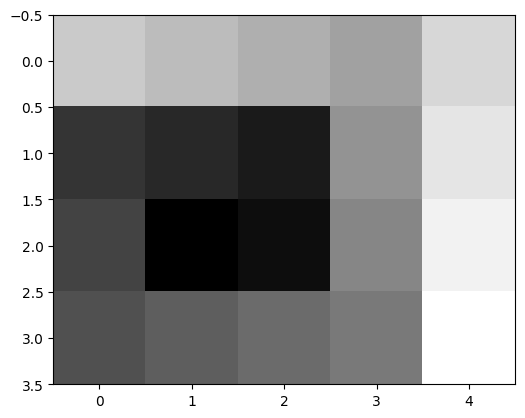

In [3]:
def build_spiral_small(num_cells_x, num_cells_y, start_x, start_y):
    
    grid_array = np.zeros((num_cells_y, num_cells_x), dtype=int)
    
    directions = [(1, 0), (0, -1), (-1, 0), (0, 1)] 
    direction_index = 0

    x, y = start_x, start_y
    cell_id = 1
    step_size = 1 
    steps_taken = 0
    direction_changes = 0  
    num_total = num_cells_x * num_cells_y

    while cell_id <= num_total:
        grid_array[y, x] = cell_id
        cell_id += 1
        
        print(x,y)
        dx, dy = directions[direction_index]
        x += dx
        y += dy
        steps_taken += 1

        if steps_taken == step_size:
            steps_taken = 0
            direction_index = (direction_index + 1) % 4
            direction_changes += 1

            if direction_changes % 2 == 0:
                step_size += 1

    return grid_array

num_cells_x = 5
num_cells_y = 4

start_x = round(num_cells_x / 2) - 1
start_y = num_cells_y // 2 

spiral_image = build_spiral_small(num_cells_x, num_cells_y, start_x, start_y)

plt.imshow(spiral_image, cmap='gray')
plt.show()

[np.int64(5), np.int64(4), np.int64(3), np.int64(12), np.int64(6), np.int64(1), np.int64(2), np.int64(11), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
[(0, 0), (0, 1024), (0, 2048), (0, 3072), (1024, 0), (1024, 1024), (1024, 2048), (1024, 3072), (2048, 0), (2048, 1024), (2048, 2048), (2048, 3072)]
[(1024, 1024), (1024, 2048), (0, 2048), (0, 1024), (0, 0), (1024, 0), (2048, 0), (2048, 1024), (2048, 2048), (2048, 3072), (1024, 3072), (0, 3072)]


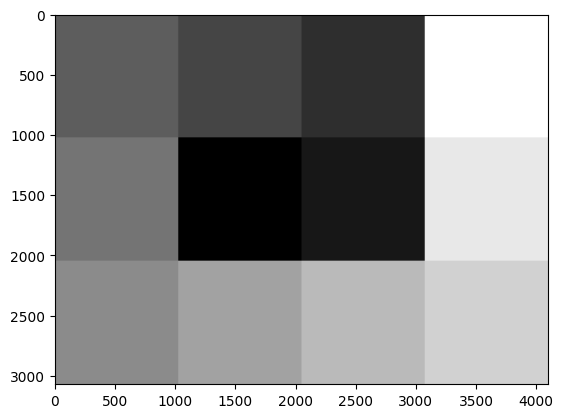

In [33]:
def build_spiral_big(num_cells_x, num_cells_y, start_x, start_y, cell_size=4096):
    
    coord_desordenado = []
    lista_id = []
    coord_ordenado = []

    grid_array = np.zeros((num_cells_y, num_cells_x), dtype=int)
    
    directions = [(1, 0), (0, -1), (-1, 0), (0, 1)] 
    direction_index = 0

    x, y = start_x, start_y
    cell_id = 1
    step_size = 1 
    steps_taken = 0
    direction_changes = 0  
    num_total = num_cells_x * num_cells_y

    while cell_id <= num_total:
        grid_array[y, x] = cell_id
        cell_id += 1
        
        dx, dy = directions[direction_index]
        x += dx
        y += dy
        steps_taken += 1

        if steps_taken == step_size:
            steps_taken = 0
            direction_index = (direction_index + 1) % 4
            direction_changes += 1

            if direction_changes % 2 == 0:
                step_size += 1

    image_height = num_cells_y * cell_size
    image_width = num_cells_x * cell_size
    image = np.zeros((image_height, image_width), dtype=int)

    for i in range(num_cells_y):
        for j in range(num_cells_x):
            cell_value = grid_array[i, j]
            lista_id.append(cell_value)
            y_start, y_end = i * cell_size, (i + 1) * cell_size
            x_start, x_end = j * cell_size, (j + 1) * cell_size
            image[y_start:y_end, x_start:x_end] = cell_value
            coord_desordenado.append((y_start, x_start))

    coord_ordenado = [coord_desordenado[id_ - 1] for id_ in lista_id]
    coord_ordenado = [coord_desordenado[lista_id.index(i)] for i in range(1, len(coord_desordenado) + 1)]

    print(lista_id)
    print(coord_desordenado)
    print(coord_ordenado)

    return image, coord_desordenado



num_cells_x = 4  
num_cells_y = 3 
cell_size = 1024 
start_x = round(num_cells_x / 2) - 1
start_y = num_cells_y // 2 

spiral_image, grid_coordinates = build_spiral_big(num_cells_x, num_cells_y, start_x, start_y, cell_size)

plt.imshow(spiral_image, cmap='gray')
plt.show()